In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [19]:
metadata_path = '../Data/Dataset_Medellin/merge_cases_WeeklyTemperature_WeeklyPrecipitation_timeseries.csv'
rgb_images_path = '../Data/dataset_rbg/'
band7_images_path = '../Data/data_7_bands/'

## Metadata

In [20]:
# Read Data
merge_cases_temp_precip = pd.read_csv(metadata_path)
# Remove extra column
merge_cases_temp_precip.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
merge_cases_temp_precip.rename(columns={'temperature':'temperature_medellin'}, inplace=True)
merge_cases_temp_precip.LastDayWeek = pd.to_datetime(merge_cases_temp_precip.LastDayWeek)
merge_cases_temp_precip

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,percipitation_medellin,percipitation_medellin_rural,percipitation_medellin_urbano,temperature_medellin
0,1,"['2007', 'w01']",2007,200701,2007-01-06,1,13.096688,14.097693,12.628933,19.615357
1,0,"['2007', 'w02']",2007,200702,2007-01-13,1,8.437044,6.910390,9.067214,22.234000
2,0,"['2007', 'w03']",2007,200703,2007-01-20,1,19.373165,21.616968,18.406665,22.268857
3,0,"['2007', 'w04']",2007,200704,2007-01-27,1,0.000000,0.000000,0.000000,23.546000
4,0,"['2007', 'w05']",2007,200705,2007-02-03,2,3.725206,3.144225,3.901021,25.353071
...,...,...,...,...,...,...,...,...,...,...
619,28,"['2018', 'w48']",2018,201848,2018-12-01,12,8.916642,8.656351,9.114419,21.436857
620,12,"['2018', 'w49']",2018,201849,2018-12-08,12,17.006086,16.076869,17.334870,22.156286
621,27,"['2018', 'w50']",2018,201850,2018-12-15,12,5.673248,5.388778,5.794555,17.271000
622,17,"['2018', 'w51']",2018,201851,2018-12-22,12,2.785103,2.708024,2.810241,19.071071


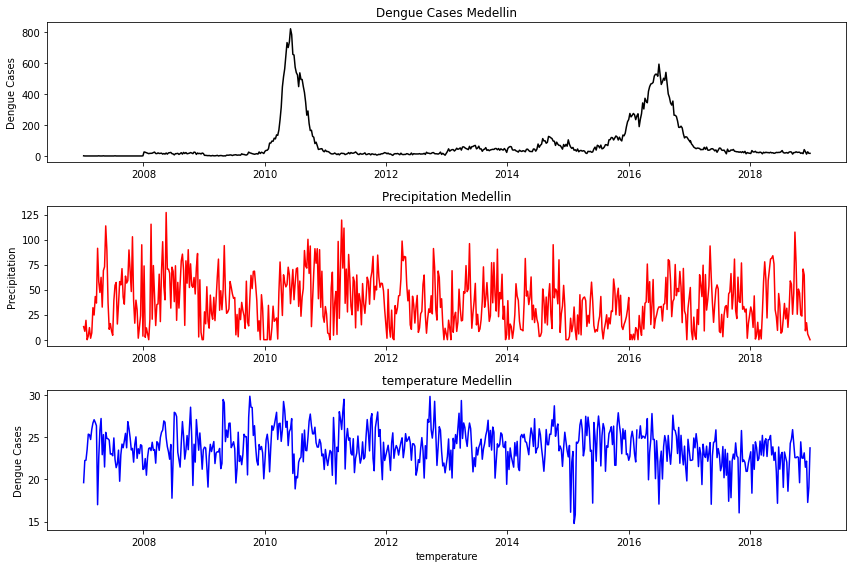

In [21]:
f, axarr = plt.subplots(3, 1, figsize=(12, 8))


axarr[0].plot(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['cases_medellin'], color ='black')
axarr[0].set_title('Dengue Cases Medellin')
axarr[0].set_ylabel('Dengue Cases')
plt.tight_layout()

axarr[1].plot(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['percipitation_medellin'], color ='red')
axarr[1].set_title('Precipitation Medellin')
axarr[1].set_ylabel('Precipitation')
plt.tight_layout()

axarr[2].plot(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['temperature_medellin'], color ='blue')
axarr[2].set_title('temperature Medellin')
axarr[2].set_xlabel('temperature') 
axarr[2].set_ylabel('Dengue Cases')
plt.tight_layout()


plt.show()

## Satellie Images RGB

In [22]:
image_dates = []
for image_name in os.listdir(rgb_images_path):
    image_dates.append(image_name[image_name.index('_')+1:image_name.index('.')])
image_dates = pd.DataFrame(image_dates)
image_dates.rename(columns={0:'dates'}, inplace=True)
image_dates['dates'] = pd.to_datetime(image_dates['dates'])
image_dates.sort_values(by="dates")

,dates
15,2016-01-03
187,2016-01-10
218,2016-01-17
134,2016-01-24
219,2016-02-07
...,...
149,2021-08-07
33,2021-08-14
229,2021-08-21
131,2021-08-28


## 7 Band Images

In [23]:
image7_dates = []
for image_name in os.listdir(band7_images_path):
    image7_dates.append(image_name[image_name.index('_')+1:image_name.index('.')])
image7_dates = pd.DataFrame(image7_dates)
image7_dates.rename(columns={0:'dates'}, inplace=True)
image7_dates['dates'] = pd.to_datetime(image7_dates['dates'])
image7_dates.sort_values(by="dates")

,dates
15,2016-01-03
194,2016-01-10
226,2016-01-17
137,2016-01-24
155,2016-01-31
...,...
153,2021-08-07
33,2021-08-14
237,2021-08-21
134,2021-08-28


# Missing Values RGB

In [24]:
common = image7_dates.merge(image_dates, on=['dates'])

image7_dates[~image7_dates.dates.isin(common.dates)]

,dates
60,2016-02-28
68,2016-03-13
92,2016-04-10
144,2016-10-30
154,2016-02-21
155,2016-01-31
176,2016-05-29
203,2017-01-15
246,2017-01-08
271,2016-03-27


## Create dataset

In [25]:
image7_dates['image_name'] = image7_dates.dates.apply(lambda x: 'image_' + str(x)[:10] + '.tiff')
image7_dates.rename(columns={'dates': 'LastDayWeek'},inplace=True)
image7_dates

,LastDayWeek,image_name
0,2016-10-02,image_2016-10-02.tiff
1,2019-06-01,image_2019-06-01.tiff
2,2019-05-11,image_2019-05-11.tiff
3,2017-05-28,image_2017-05-28.tiff
4,2019-01-05,image_2019-01-05.tiff
...,...,...
292,2019-04-13,image_2019-04-13.tiff
293,2018-12-29,image_2018-12-29.tiff
294,2017-05-07,image_2017-05-07.tiff
295,2017-09-24,image_2017-09-24.tiff


In [26]:
from datetime import timedelta

def sum_1(day):
    
    if str(day)[:4] in ['2016', '2017']:
        day = day + timedelta(days=6)
    return day

In [27]:
image7_dates = image7_dates.applymap(sum_1)
image7_dates

,LastDayWeek,image_name
0,2016-10-08,image_2016-10-02.tiff
1,2019-06-01,image_2019-06-01.tiff
2,2019-05-11,image_2019-05-11.tiff
3,2017-06-03,image_2017-05-28.tiff
4,2019-01-05,image_2019-01-05.tiff
...,...,...
292,2019-04-13,image_2019-04-13.tiff
293,2018-12-29,image_2018-12-29.tiff
294,2017-05-13,image_2017-05-07.tiff
295,2017-09-30,image_2017-09-24.tiff


In [28]:
columns = ['cases_medellin', 'YearWeek', 'LastDayWeek', 'percipitation_medellin', 'temperature_medellin']
merge_cases_temp_precip = merge_cases_temp_precip[columns].rename(columns={'percipitation_medellin_urbano': 'percipitation_medellin'})
merge_cases_temp_precip

,cases_medellin,YearWeek,LastDayWeek,percipitation_medellin,temperature_medellin
0,1,200701,2007-01-06,13.096688,19.615357
1,0,200702,2007-01-13,8.437044,22.234000
2,0,200703,2007-01-20,19.373165,22.268857
3,0,200704,2007-01-27,0.000000,23.546000
4,0,200705,2007-02-03,3.725206,25.353071
...,...,...,...,...,...
619,28,201848,2018-12-01,8.916642,21.436857
620,12,201849,2018-12-08,17.006086,22.156286
621,27,201850,2018-12-15,5.673248,17.271000
622,17,201851,2018-12-22,2.785103,19.071071


In [29]:
dataset = merge_cases_temp_precip.merge(image7_dates, on =['LastDayWeek'], how='inner')
dataset

,cases_medellin,YearWeek,LastDayWeek,percipitation_medellin,temperature_medellin,image_name
0,274,201602,2016-01-09,0.000000,22.744857,image_2016-01-03.tiff
1,252,201603,2016-01-16,5.154850,24.934929,image_2016-01-10.tiff
2,262,201604,2016-01-23,0.000000,25.693857,image_2016-01-17.tiff
3,274,201605,2016-01-30,5.560972,24.786357,image_2016-01-24.tiff
4,266,201606,2016-02-06,0.000000,23.042000,image_2016-01-31.tiff
...,...,...,...,...,...,...
150,28,201848,2018-12-01,8.916642,21.436857,image_2018-12-01.tiff
151,12,201849,2018-12-08,17.006086,22.156286,image_2018-12-08.tiff
152,27,201850,2018-12-15,5.673248,17.271000,image_2018-12-15.tiff
153,17,201851,2018-12-22,2.785103,19.071071,image_2018-12-22.tiff


## Download

In [30]:
dataset.to_csv('../Data/Dataset_Medellin/medellin_data_2016-2018')

In [31]:
merge_cases_temp_precip.LastDayWeek[merge_cases_temp_precip.LastDayWeek <= '2016-01-5']

0     2007-01-06
1     2007-01-13
2     2007-01-20
3     2007-01-27
4     2007-02-03
         ...    
464   2015-12-05
465   2015-12-12
466   2015-12-19
467   2015-12-26
468   2016-01-02
Name: LastDayWeek, Length: 469, dtype: datetime64[ns]